### The objective of this competition is to create a machine learning model to predict which individuals are most likely to have or use a bank account. 
### the models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, 
### while providing insights into some of the key factors driving individuals’ financial security.

## 1. Getting the libraries needed

In [1]:
!pip install files

In [2]:
# Getting the data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Data Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# MachineLearning / Models
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


## 2. Loading the data

In [4]:
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")
Variables = pd.read_csv("VariableDefinitions.csv")

In [5]:
print(f"Train_df has:  {train_df.shape[0]} rows , {train_df.shape[1]} columns ")
print(f"Test_df has:  {test_df.shape[0]} rows , {test_df.shape[1]} columns ")

Train_df has:  23524 rows , 13 columns 
Test_df has:  10086 rows , 12 columns 


In [7]:
train_df.head(20)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7,26,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,No,Rural,Yes,7,32,Female,Spouse,Married/Living together,Primary education,Self employed
7,Kenya,2018,uniqueid_8,No,Rural,Yes,1,42,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3,54,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
9,Kenya,2018,uniqueid_10,No,Urban,Yes,3,76,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent


In [8]:
train_df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

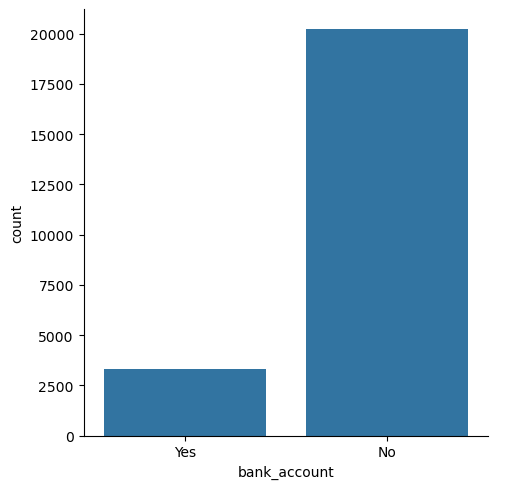

In [9]:
sns.catplot(x="bank_account", kind="count", data=train_df)

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


## 3. Data Preprocessing

In [12]:

# Cobvert target label to numerical Data
le = LabelEncoder()
train_df['bank_account'] = le.fit_transform(train_df['bank_account'])

#Separate training features from target
X_train = train_df.drop(['bank_account'], axis=1)
y_train = train_df['bank_account']
print(y_train)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64


In [14]:
def preprocessing_data(data):

    # Convert the following numerical labels from interger to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)
    
    # categorical features to be onverted to One Hot Encoding
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]
    
    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)
    
    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    
    # drop uniquid column
    data = data.drop(["uniqueid"], axis=1)
    
    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    
    return data  

In [19]:
# preprocess the train data 
processed_train = preprocessing_data(X_train)
processed_test = preprocessing_data(test_df)

In [22]:
# the first train row
print(processed_train[:1])

[[1.        0.        1.        0.1       0.0952381 0.        0.
  0.        0.        0.        0.        1.        0.        0.
  1.        0.        0.        0.        0.        0.        1.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        1.        1.        0.
  0.        0.       ]]


In [25]:
# shape of the processed train set
print(processed_train.shape)

(23524, 37)


In [28]:
# Split train_data
from sklearn.model_selection import train_test_split

X_Train, X_Val, y_Train, y_val = train_test_split(processed_train, y_train, stratify = y_train, 
                                                  test_size = 0.1, random_state=42)

In [30]:
#import classifier algorithm here


# create models
RFC = RandomForestClassifier()

#fitting the models
RFC.fit(X_Train,y_Train)

RandomForestClassifier()

In [32]:
# import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

# evaluate the model
RFC_y_model = RFC.predict(X_Val)

# Get error rate
print("Error rate of RandomForestclassifier: ", 1 - accuracy_score(y_val, RFC_y_model))

Error rate of RandomForestclassifier:  0.13599660008499792


In [33]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix


# Get confusion matrix for Gradient Boosting Classifier
plot_confusion_matrix(RFC,X_Val, y_val,normalize='true')

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/home/gekika/anaconda3/lib/python3.12/site-packages/sklearn/metrics/__init__.py)

In [40]:
pip install --upgrade scikit-learn


  Using cached scikit_learn-1.6.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 877.2 kB/s eta 0:00:000:00:010:00:01:02
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.1
    Uninstalling scikit-learn-1.5.1:
      Successfully uninstalled scikit-learn-1.5.1
Note: you may need to restart the kernel to use updated packages.


In [41]:
test_df.bank_account = RFC.predict(processed_test)

/tmp/ipykernel_44006/4077576377.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test_df.bank_account = RFC.predict(processed_test)


In [42]:
# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": test_df["uniqueid"] + " x " + test_df["country"],
                           "bank_account": test_df.bank_account})

In [ ]:
submission.sample(5)

In [ ]:
# Create submission csv file csv file
submission.to_csv('first_submission.csv', index = False)
files.download('first_submission.csv') 

In [ ]:
!pip install files

In [ ]:
# Create submission csv file csv file
submission.to_csv('first_submission.csv', index = False)
files.download('first_submission.csv') 